<a href="https://colab.research.google.com/github/Vijay3alaji/Statistics/blob/main/Box_jenkins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
np.random.seed(42)
data = np.cumsum(np.random.normal(loc=0, scale=1, size=100)) # Simulated random walk
time_series = pd.Series(data)

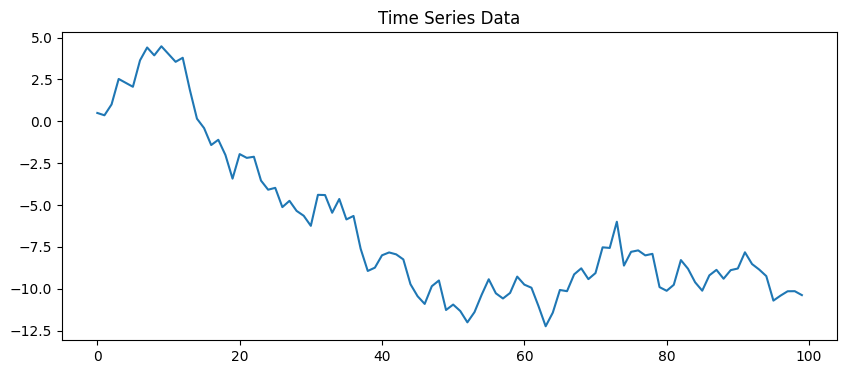

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(time_series)
plt.title('Time Series Data')
plt.show()

In [ ]:
result = adfuller(time_series)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.3583317659818992
p-value: 0.6020814791099098


In [ ]:
# 4. Differencing to make the data stationary (if necessary)
if result[1] > 0.05:  # p-value > 0.05 means it's not stationary
    time_series_diff = time_series.diff().dropna()  # First difference to remove trend
else:
    time_series_diff = time_series  # Data is already stationary

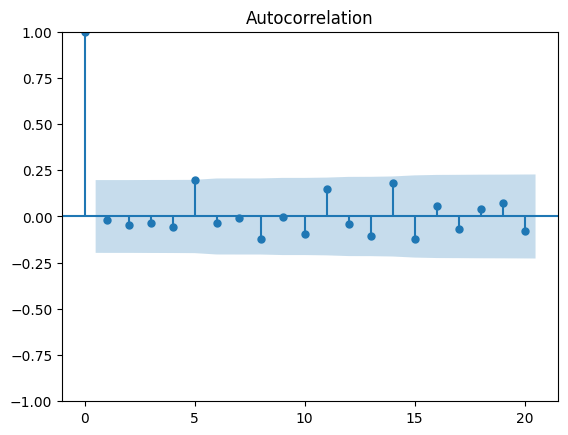

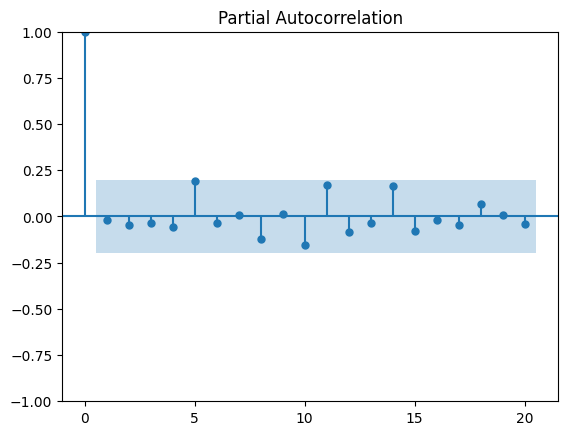

In [ ]:
plot_acf(time_series_diff, lags=20)
plot_pacf(time_series_diff, lags=20)
plt.show()

In [ ]:
# 6. Fit ARIMA Model (ARIMA(1,1,1) is an example)
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
# 7. Summary of the ARIMA model
print(model_fit.summary())

# 8. Forecast future values
forecast = model_fit.forecast(steps=10)  # Forecast the next 10 values
print(f"Forecasted Values: {forecast}")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -131.425
Date:                Fri, 18 Oct 2024   AIC                            268.850
Time:                        10:27:29   BIC                            276.635
Sample:                             0   HQIC                           272.000
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3997      5.647      0.071      0.944     -10.669      11.468
ma.L1         -0.4158      5.590     -0.074      0.941     -11.371      10.540
sigma2         0.8329      0.123      6.780      0.0

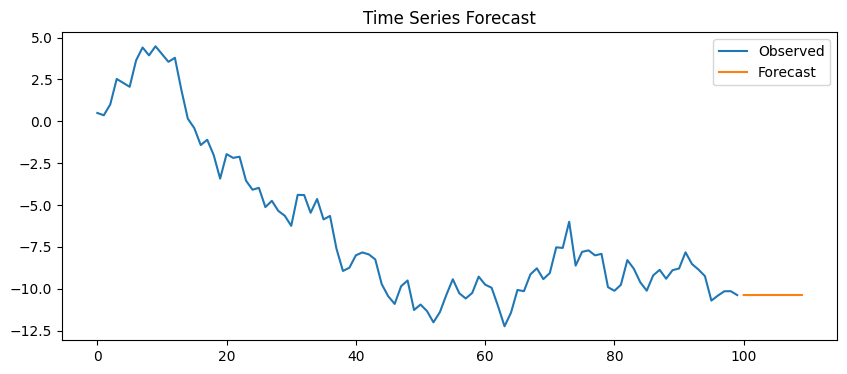

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(time_series, label='Observed')
plt.plot(np.arange(len(time_series), len(time_series) + 10), forecast, label='Forecast')
plt.title('Time Series Forecast')
plt.legend()
plt.show()